# First practice

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model.metrics_names

# Basic classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
# load fashion mnist 
fashion_mnist = keras.datasets.mnist # fashion_mnist.load_data() does not exist for r1.5
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
uniq, count = np.unique(train_labels,return_counts=True)
np.vstack((uniq,count)).T

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.set_cmap('gray')
plt.grid(False)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test acciracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label== true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 5
plt.figure()
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# Text classification with movie reviews

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# get IMDB data
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

print(train_data[0])

In [ ]:
# convert word index to string
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(txt):
    return ' '.join([reverse_word_index.get(i, '?') for i in txt])


decode_review(train_data[5])

In [ ]:
# padding to make all reviews the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')

len(train_data[0]), len(test_data[0])

print(train_data[0])

In [ ]:
# build the model
vocab_size = 10000
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# create a validation set
x_val = train_data[:10000]
partial_x_train = train_data[1000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=1)

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf() # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Regression

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers # should test whether this work in 1.12, yes it works in 1.12
# from tensorflow.python.keras import layers # workaround for 1.5

print(tf.__version__)

1.12.0


In [2]:
# get Auto MPG dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/home/osiris/.keras/datasets/auto-mpg.data'

In [3]:
# load into pandas
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
               'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, sep=" ", names=column_names,
                         na_values="?", comment='\t', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
# covert "Origin" to a one-hot since it is a category
origin = dataset.pop('Origin')

dataset['USA'] = (origin==1)*1.0
dataset['Europe'] = (origin==2)*1.0
dataset['Japan'] = (origin==3)*1.0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [7]:
# split data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(index=train_dataset.index)

/home/osiris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


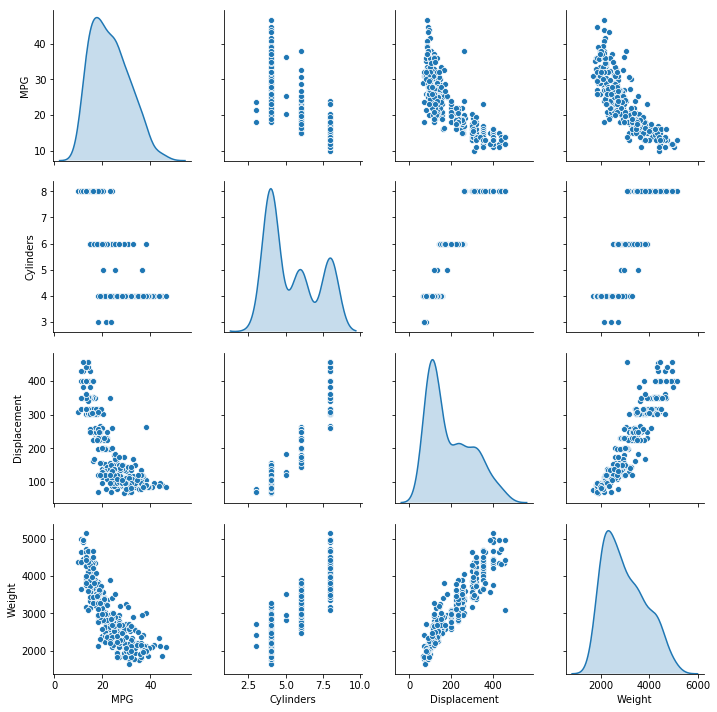

In [8]:
# inspec the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [10]:
# split features from labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [11]:
# normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
# Build a model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=optimizer,
                 loss='mse',
                 metrics=['mae','mse'])
    return model

In [14]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [16]:
# try out the model
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch) # check whether .values is needed in 1.12, it's not needed in 1.12
example_result

array([[-0.08125846],
       [-0.24107555],
       [-0.6906897 ],
       [-0.3854979 ],
       [-0.785884  ],
       [-0.19692272],
       [-0.8161127 ],
       [-0.53219897],
       [-0.12408123],
       [-0.7289312 ]], dtype=float32)

In [17]:
# Train the model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
            
EPOCHS = 1000

history = model.fit(normed_train_data.values, train_labels, epochs=EPOCHS, 
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,9.441727,2.359432,9.441727,2.652160,1.005413,2.652160,995
996,9.543748,2.362226,9.543748,2.497300,0.963679,2.497300,996
997,9.091303,2.319411,9.091303,2.719138,1.028769,2.719138,997
998,9.200399,2.322203,9.200399,2.466597,0.942106,2.466597,998
999,8.845747,2.298466,8.845747,2.526058,0.982731,2.526058,999


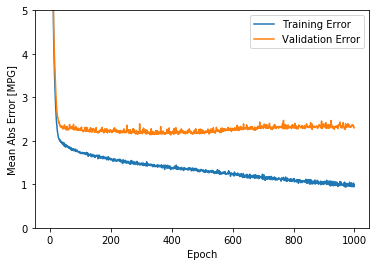

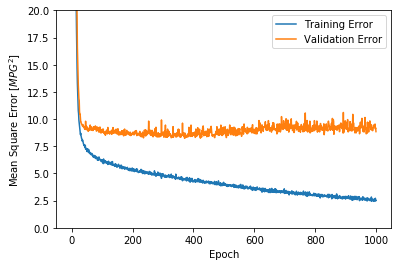

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    ax = hist.plot(x='epoch',y=['mean_absolute_error','val_mean_absolute_error'],
                  ylim=[0,5])
    # ax.set_ylim([0,7])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Abs Error [MPG]')
    ax.legend(['Training Error','Validation Error'])

    ax = hist.plot(x='epoch',y=['mean_squared_error','val_mean_squared_error'],
                  ylim=[0,20])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Square Error [$MPG^2$]')
    ax.legend(['Training Error','Validation Error'])
    
plot_history(history)


.................................................................

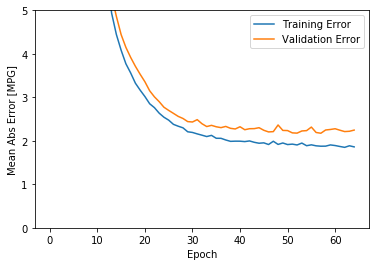

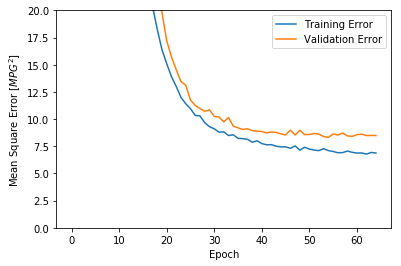

In [20]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data.values, train_labels,
                    epochs=EPOCHS, validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])
plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data.values, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:0.2f} MPG".format(mae))

Testing set Mean Abs Error: 1.84 MPG


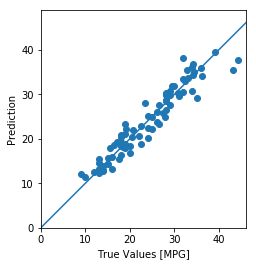

In [22]:
test_predictions = model.predict(normed_test_data).flatten()
# test_predictions.flatten()

import matplotlib.pyplot as plt

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Prediction')

plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])

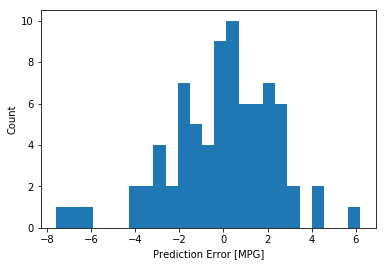

In [23]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Overfitting and underfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), NUM_WORDS))
    
    for i, word_idx in enumerate(sequences):
        results[i, word_idx] = 1.0
        
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


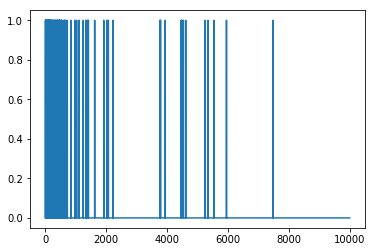

In [9]:
plt.plot(train_data[0])

In [3]:
# Demonstrate overfitting
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [4]:
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()
                      

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512, verbose=2,
                                     validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4893 - acc: 0.7909 - binary_crossentropy: 0.4893 - val_loss: 0.3259 - val_acc: 0.8800 - val_binary_crossentropy: 0.3259
Epoch 2/20
 - 3s - loss: 0.2393 - acc: 0.9144 - binary_crossentropy: 0.2393 - val_loss: 0.2856 - val_acc: 0.8863 - val_binary_crossentropy: 0.2856
Epoch 3/20
 - 3s - loss: 0.1742 - acc: 0.9395 - binary_crossentropy: 0.1742 - val_loss: 0.2936 - val_acc: 0.8838 - val_binary_crossentropy: 0.2936
Epoch 4/20
 - 3s - loss: 0.1383 - acc: 0.9536 - binary_crossentropy: 0.1383 - val_loss: 0.3203 - val_acc: 0.8779 - val_binary_crossentropy: 0.3203
Epoch 5/20
 - 3s - loss: 0.1146 - acc: 0.9634 - binary_crossentropy: 0.1146 - val_loss: 0.3487 - val_acc: 0.8720 - val_binary_crossentropy: 0.3487
Epoch 6/20
 - 3s - loss: 0.0935 - acc: 0.9711 - binary_crossentropy: 0.0935 - val_loss: 0.3791 - val_acc: 0.8693 - val_binary_crossentropy: 0.3791
Epoch 7/20
 - 3s - loss: 0.0761 - acc: 0.9788 - binary_crossentropy:

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
smaller_history = smaller_model.fit(train_data, train_labels,
                                   epochs=20, batch_size=512, verbose=2,
                                   validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6137 - acc: 0.6324 - binary_crossentropy: 0.6137 - val_loss: 0.5513 - val_acc: 0.7670 - val_binary_crossentropy: 0.5513
Epoch 2/20
 - 2s - loss: 0.5020 - acc: 0.8273 - binary_crossentropy: 0.5020 - val_loss: 0.4951 - val_acc: 0.8474 - val_binary_crossentropy: 0.4951
Epoch 3/20
 - 2s - loss: 0.4493 - acc: 0.8834 - binary_crossentropy: 0.4493 - val_loss: 0.4663 - val_acc: 0.8582 - val_binary_crossentropy: 0.4663
Epoch 4/20
 - 2s - loss: 0.4130 - acc: 0.9109 - binary_crossentropy: 0.4130 - val_loss: 0.4485 - val_acc: 0.8662 - val_binary_crossentropy: 0.4485
Epoch 5/20
 - 2s - loss: 0.3826 - acc: 0.9286 - binary_crossentropy: 0.3826 - val_loss: 0.4399 - val_acc: 0.8615 - val_binary_crossentropy: 0.4399
Epoch 6/20
 - 2s - loss: 0.3527 - acc: 0.9431 - binary_crossentropy: 0.3527 - val_loss: 0.4235 - val_acc: 0.8706 - val_binary_crossentropy: 0.4235
Epoch 7/20
 - 2s - loss: 0.3226 - acc: 0.9531 - binary_crossentropy:

In [22]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [23]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20, batch_size=512, verbose=2,
                                 validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3463 - acc: 0.8545 - binary_crossentropy: 0.3463 - val_loss: 0.3040 - val_acc: 0.8762 - val_binary_crossentropy: 0.3040
Epoch 2/20
 - 17s - loss: 0.1346 - acc: 0.9510 - binary_crossentropy: 0.1346 - val_loss: 0.3582 - val_acc: 0.8633 - val_binary_crossentropy: 0.3582
Epoch 3/20
 - 18s - loss: 0.0405 - acc: 0.9889 - binary_crossentropy: 0.0405 - val_loss: 0.4389 - val_acc: 0.8694 - val_binary_crossentropy: 0.4389
Epoch 4/20
 - 17s - loss: 0.0059 - acc: 0.9994 - binary_crossentropy: 0.0059 - val_loss: 0.6082 - val_acc: 0.8669 - val_binary_crossentropy: 0.6082
Epoch 5/20
 - 17s - loss: 7.2290e-04 - acc: 1.0000 - binary_crossentropy: 7.2290e-04 - val_loss: 0.6765 - val_acc: 0.8719 - val_binary_crossentropy: 0.6765
Epoch 6/20
 - 17s - loss: 2.0306e-04 - acc: 1.0000 - binary_crossentropy: 2.0306e-04 - val_loss: 0.7157 - val_acc: 0.8723 - val_binary_crossentropy: 0.7157
Epoch 7/20
 - 17s - loss: 1.2460e-04 - acc: 1.

In [25]:
baseline_history.history

{'val_loss': [0.38658821042060854,
  0.2890294417667389,
  0.288183205947876,
  0.31239734330177304,
  0.3397390282344818,
  0.37177972630500794,
  0.42948228490829465,
  0.4478609118938446,
  0.4933909885978699,
  0.5468079772853851,
  0.581447890586853,
  0.6253001755714417,
  0.6667261422729492,
  0.7019928365898133,
  0.7415129371833801,
  0.7669892889213562,
  0.8000615661811828,
  0.8297010569763184,
  0.8452391398620606,
  0.8743413351249695],
 'val_acc': [0.8685599998474121,
  0.8874800004196167,
  0.8863200002288818,
  0.8784000001335144,
  0.8752000004768371,
  0.8712000003814697,
  0.8632399995231629,
  0.8643599998092651,
  0.8610799996185303,
  0.8586000004386902,
  0.8581199996185302,
  0.8563999996185303,
  0.8560399995231628,
  0.8542399995231629,
  0.8535200003433228,
  0.8527199996185303,
  0.8527999997138977,
  0.8514399997138977,
  0.8518799995231628,
  0.8514399997138977],
 'val_binary_crossentropy': [0.38658821042060854,
  0.2890294417667389,
  0.288183205947876,


In [6]:
# Plot history
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        # plot validation as --
        val = plt.plot(history.epoch, history.history['val_'+key], '--',
                      label=name.title()+' Val')
        
        # plot training
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

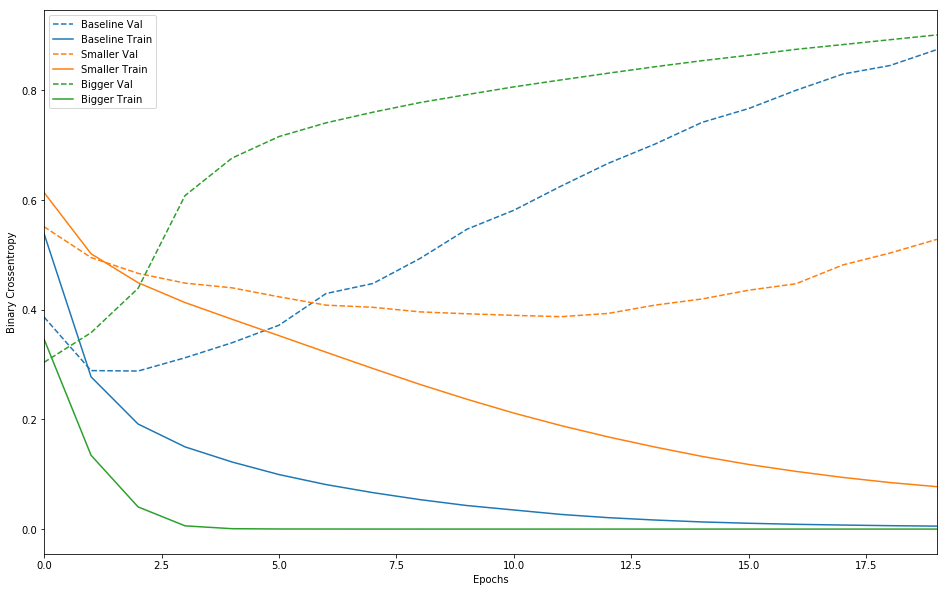

In [38]:
 
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [9]:
# L2 regularization
l2_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, 
                       kernel_regularizer=keras.regularizers.l2(0.001),
                       input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu, 
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_history = l2_model.fit(train_data, train_labels,
                          epochs=20, batch_size=521, verbose=2,
                          validation_data=(test_data, test_labels))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5274 - acc: 0.8080 - binary_crossentropy: 0.4842 - val_loss: 0.3852 - val_acc: 0.8756 - val_binary_crossentropy: 0.3400
Epoch 2/20
 - 3s - loss: 0.3107 - acc: 0.9056 - binary_crossentropy: 0.2613 - val_loss: 0.3416 - val_acc: 0.8858 - val_binary_crossentropy: 0.2893
Epoch 3/20
 - 3s - loss: 0.2613 - acc: 0.9259 - binary_crossentropy: 0.2065 - val_loss: 0.3408 - val_acc: 0.8850 - val_binary_crossentropy: 0.2845
Epoch 4/20
 - 3s - loss: 0.2368 - acc: 0.9369 - binary_crossentropy: 0.1791 - val_loss: 0.3519 - val_acc: 0.8816 - val_binary_crossentropy: 0.2933
Epoch 5/20
 - 3s - loss: 0.2223 - acc: 0.9444 - binary_crossentropy: 0.1625 - val_loss: 0.3610 - val_acc: 0.8801 - val_binary_crossentropy: 0.3006
Epoch 6/20
 - 3s - loss: 0.2109 - acc: 0.9488 - binary_crossentropy: 0.1496 - val_loss: 0.3789 - val_acc: 0.8754 - val_binary_crossentropy: 0.3171
Epoch 7/20
 - 3s - loss: 0.2019 - acc: 0.9534 - binary_crossentropy:

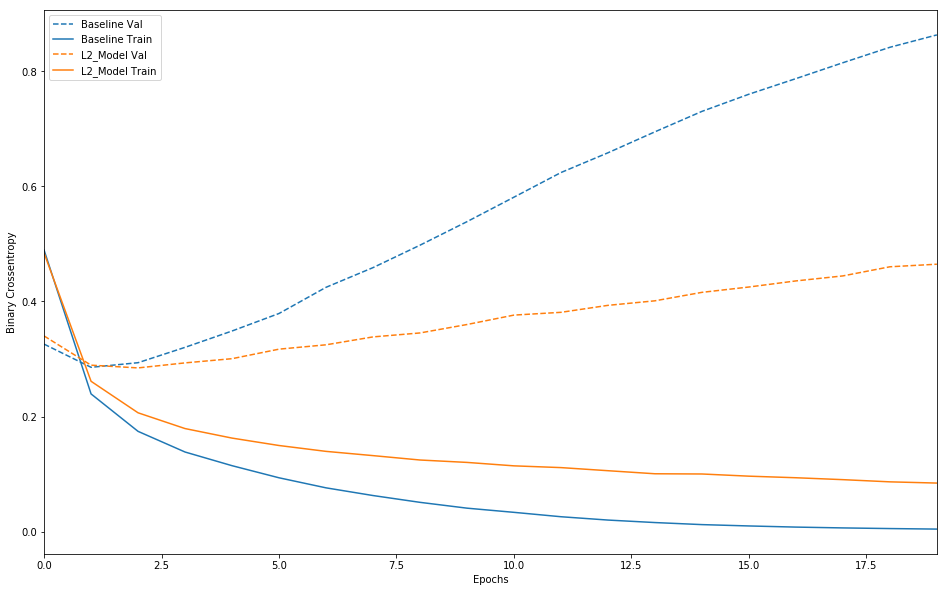

In [10]:
plot_history([('baseline', baseline_history),
             ('l2_model', l2_history)])

In [16]:
# Add dropout
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [17]:
dpt_history = dpt_model.fit(train_data, train_labels,
                           epochs=20, batch_size=512, verbose=2,
                           validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5399 - acc: 0.7502 - binary_crossentropy: 0.5399 - val_loss: 0.3710 - val_acc: 0.8672 - val_binary_crossentropy: 0.3710
Epoch 2/20
 - 3s - loss: 0.3164 - acc: 0.8831 - binary_crossentropy: 0.3164 - val_loss: 0.2889 - val_acc: 0.8861 - val_binary_crossentropy: 0.2889
Epoch 3/20
 - 3s - loss: 0.2330 - acc: 0.9160 - binary_crossentropy: 0.2330 - val_loss: 0.2774 - val_acc: 0.8876 - val_binary_crossentropy: 0.2774
Epoch 4/20
 - 3s - loss: 0.1858 - acc: 0.9364 - binary_crossentropy: 0.1858 - val_loss: 0.2906 - val_acc: 0.8825 - val_binary_crossentropy: 0.2906
Epoch 5/20
 - 3s - loss: 0.1505 - acc: 0.9512 - binary_crossentropy: 0.1505 - val_loss: 0.3051 - val_acc: 0.8819 - val_binary_crossentropy: 0.3051
Epoch 6/20
 - 3s - loss: 0.1219 - acc: 0.9604 - binary_crossentropy: 0.1219 - val_loss: 0.3323 - val_acc: 0.8776 - val_binary_crossentropy: 0.3323
Epoch 7/20
 - 3s - loss: 0.0988 - acc: 0.9700 - binary_crossentropy:

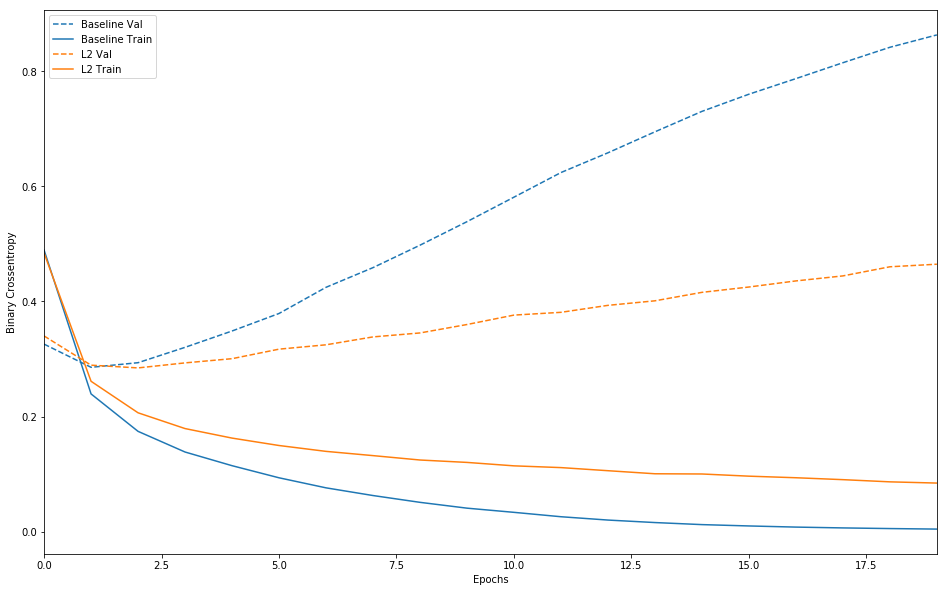

In [18]:
plot_history([('baseline', baseline_history),
             ('L2', l2_history)])

# Save and restore models

In [1]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'1.5.0'

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape((-1,28*28)) / 255.0
test_images = test_images[:1000].reshape((-1,28*28)) / 255.0

In [3]:
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_weights_only=True)

model.fit(train_images, train_labels, epochs=10,
         validation_data=(test_images, test_labels),
         callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================]1000/1000 [==============================] - 1s 790us/step - loss: 1.1545 - acc: 0.6680 - val_loss: 0.7207 - val_acc: 0.7850

Epoch 2/10
1000/1000 [==============================]1000/1000 [==============================] - 0s 377us/step - loss: 0.4335 - acc: 0.8820 - val_loss: 0.5502 - val_acc: 0.8270

Epoch 3/10
1000/1000 [==============================]1000/1000 [==============================] - 0s 351us/step - loss: 0.2764 - acc: 0.9290 - val_loss: 0.4531 - val_acc: 0.8580

Epoch 4/10
1000/1000 [==============================]1000/1000 [==============================] - 0s 355us/step - loss: 0.2043 - acc: 0.9510 - val_loss: 0.4164 - val_acc: 0.8700

Epoch 5/10
1000/1000 [==============================]1000/1000 [==============================] - 0s 350us/step - loss: 0.1547 - acc: 0.9640 - val_loss: 0.4176 - val_acc: 0.8700

Epoch 6/10
1000/1000 [==============================]1000

In [6]:
!ls {checkpoint_dir}

cp.ckpt


In [7]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:0.2f}%".format(acc*100.0))

1000/1000 [==============================]1000/1000 [==============================] - 0s 132us/step

Untrained model, accuracy: 11.90%


In [8]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:0.2f}%".format(acc*100.0))

1000/1000 [==============================]1000/1000 [==============================] - 0s 51us/step

Restored model, accuracy: 86.30%


In [25]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt" # epoch is a reserved word
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True,
                                             period=5, verbose=1)

model = create_model()

model.save_weights(checkpoint_path.format(epoch=0)) 
model.fit(train_images, train_labels, epochs=50, verbose=0,
         validation_data=(test_images, test_labels),
         callbacks=[cp_callback])

Epoch 00005: saving model to training_2/cp-0005.ckpt
Epoch 00010: saving model to training_2/cp-0010.ckpt
Epoch 00015: saving model to training_2/cp-0015.ckpt
Epoch 00020: saving model to training_2/cp-0020.ckpt
Epoch 00025: saving model to training_2/cp-0025.ckpt
Epoch 00030: saving model to training_2/cp-0030.ckpt
Epoch 00035: saving model to training_2/cp-0035.ckpt
Epoch 00040: saving model to training_2/cp-0040.ckpt
Epoch 00045: saving model to training_2/cp-0045.ckpt
Epoch 00050: saving model to training_2/cp-0050.ckpt


In [26]:
!ls {checkpoint_dir}

cp-0000.ckpt  cp-0015.ckpt  cp-0030.ckpt  cp-0045.ckpt
cp-0005.ckpt  cp-0020.ckpt  cp-0035.ckpt  cp-0050.ckpt
cp-0010.ckpt  cp-0025.ckpt  cp-0040.ckpt


In [30]:
latest = tf.train.latest_checkpoint(checkpoint_dir) # need to test in 1.12
print(latest)
latest = checkpoint_path.format(epoch=50)

None


In [37]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:0.2f}%".format(100*acc))

1000/1000 [==============================]1000/1000 [==============================] - 0s 151us/step

Restored model, accuracy: 88.10%


In [38]:
# Manually save weights
model.save_weights("./checkpoints/my_checkpoint")

model = create_model()
model.load_weights("./checkpoints/my_checkpoint")
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:0.2f}%".format(100*acc))

1000/1000 [==============================]1000/1000 [==============================] - 0s 149us/step

Restored model, accuracy: 88.10%


In [49]:
# Save the whole model as an HDF5
model = create_model()

model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')

In [5]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
loss, acc = new_model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:0.2f}%".format(100*acc))

1000/1000 [==============================]1000/1000 [==============================] - 0s 88us/step

Restored model, accuracy: 87.00%
